In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

%matplotlib inline

df = pd.read_csv('./csv/physical-20200629.csv')
column = df.columns
df.head()


,/computes0/service/id,/computes0/vcpus_used,/computes0/local_gb_used,/computes0/vcpus,/computes0/memory_mb_used,/computes0/memory_mb,/computes0/current_workload,/computes0/cpu_info/topology/cores,/computes0/cpu_info/topology/cells,/computes0/cpu_info/topology/threads,...,/computes0/metrics/hardware-ipmi-temperature#06-p2_dimm_1-6_(0x8)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-temperature#29-battery_zone_(0x1f)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-temperature#21-pci_1_(0x17)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-temperature#10-chipset_(0xc)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-temperature#35-i_o_zone_(0x25)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-temperature#09-exp_bay_drive_(0xb)/hardware-ipmi-temperature,/computes0/metrics/hardware-ipmi-current#power_meter_(0x43)/hardware-ipmi-current,/time,type,type_code
0,16,20,0,48,41472,257790,0,12,2,2,...,41.0,37.0,66.0,38.0,33.0,35.0,225.0,1593395580,ixnetwork-traffic-start,0
1,16,20,0,48,41472,257790,0,12,2,2,...,41.0,37.0,66.0,38.0,33.0,35.0,225.0,1593395640,ixnetwork-traffic-start,0
2,16,20,0,48,41472,257790,0,12,2,2,...,41.0,37.0,66.0,38.0,33.0,36.0,225.0,1593395700,ixnetwork-traffic-start,0
3,16,20,0,48,41472,257790,0,12,2,2,...,41.0,37.0,66.0,38.0,33.0,36.0,235.0,1593395760,ixnetwork-traffic-start,0
4,16,20,0,48,41472,257790,0,12,2,2,...,41.0,37.0,66.0,38.0,33.0,36.0,225.0,1593395820,ixnetwork-traffic-start,0


In [73]:
# 时间戳转成 小时:分钟 形式
X = (pd.to_datetime(df[column[-3]], unit='s') + timedelta(hours=9)).dt.strftime('%H:%M')
X.head()

0    10:53
1    10:54
2    10:55
3    10:56
4    10:57
Name: /time, dtype: object

In [74]:
# 刻度每5min一个
X_axis = X[::5]
X_axis.head()

0     10:53
5     10:58
10    11:03
15    11:08
20    11:13
Name: /time, dtype: object

In [115]:
def draw_nxm(n, m, start=0):
    for i in range(n):
        plt.figure(figsize=(20, 6))
        for j in range(m):
            index = (i * n) + j + start
            if index > len(column) - 1 :
                break
            y = df[column[index]]
            plt.subplot(n,m,1+index-start)
            plt.plot(X,y)
            plt.title('#'+str(index))
            plt.axis('off')
        plt.show()


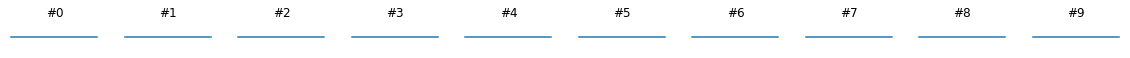

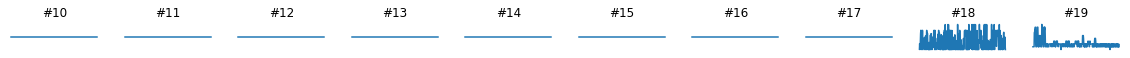

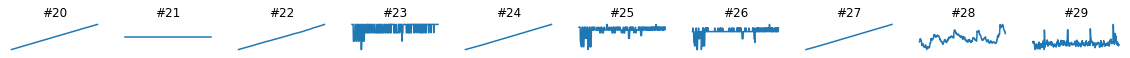

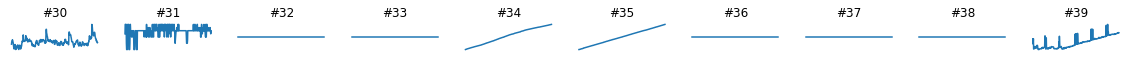

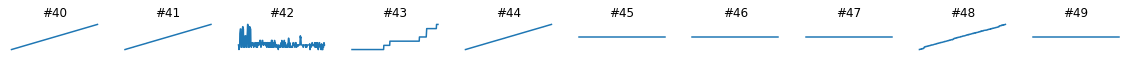

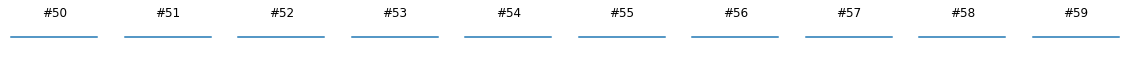

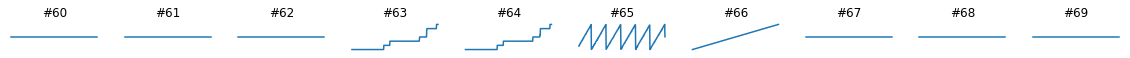

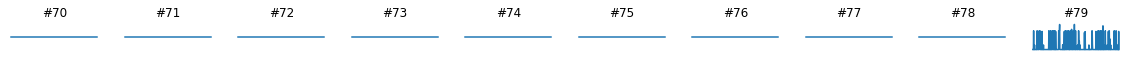

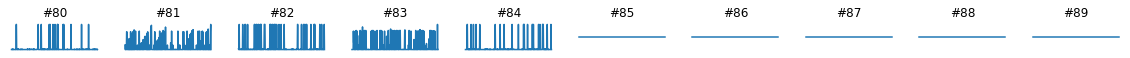

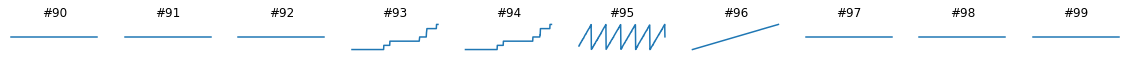

In [113]:
# 注意别画太多，很耗时
draw_nxm(10,10)

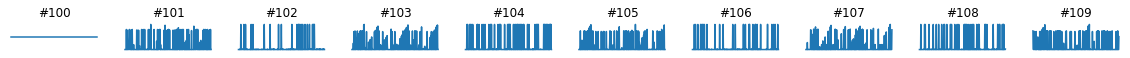

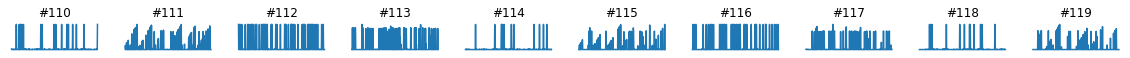

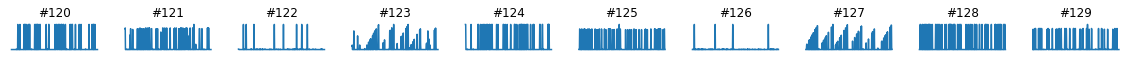

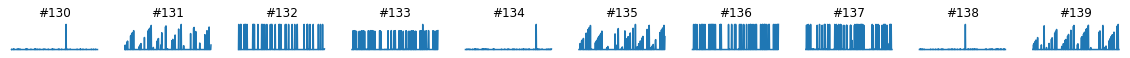

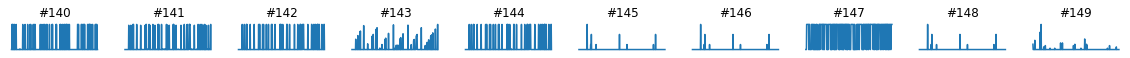

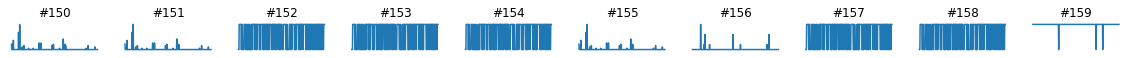

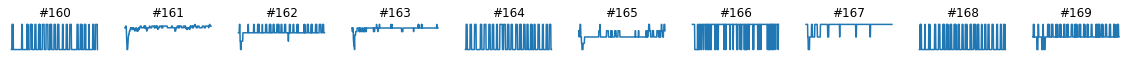

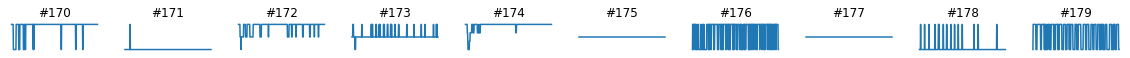

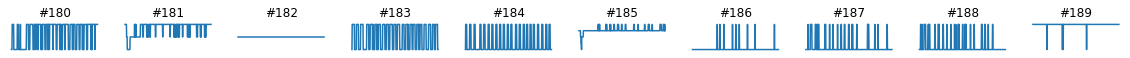

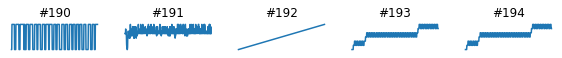

In [116]:
# 从第100个属性开始
draw_nxm(10,10,100)

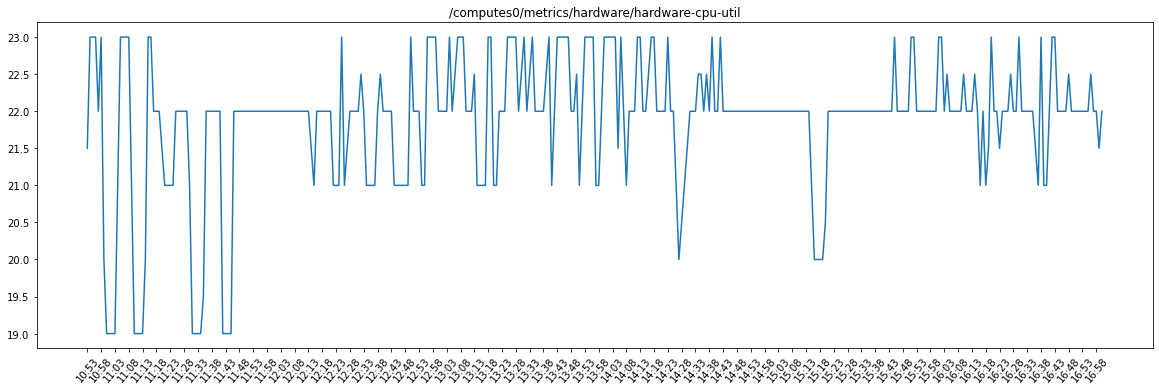

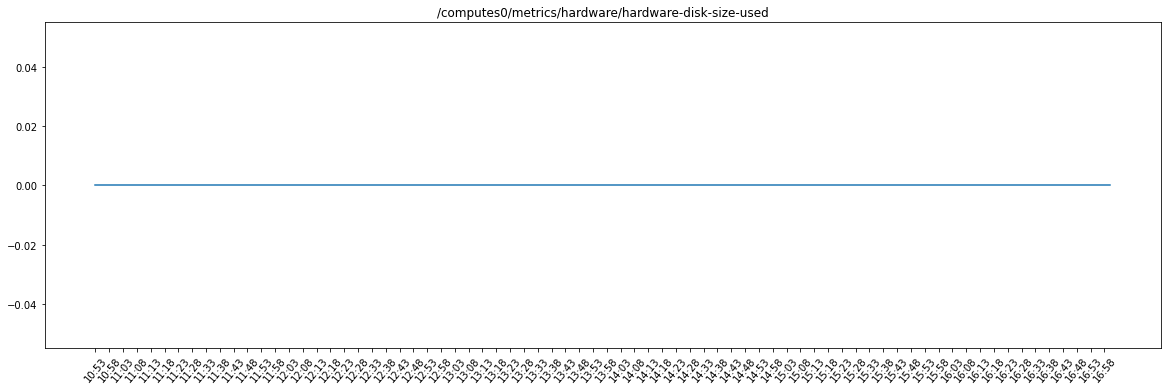

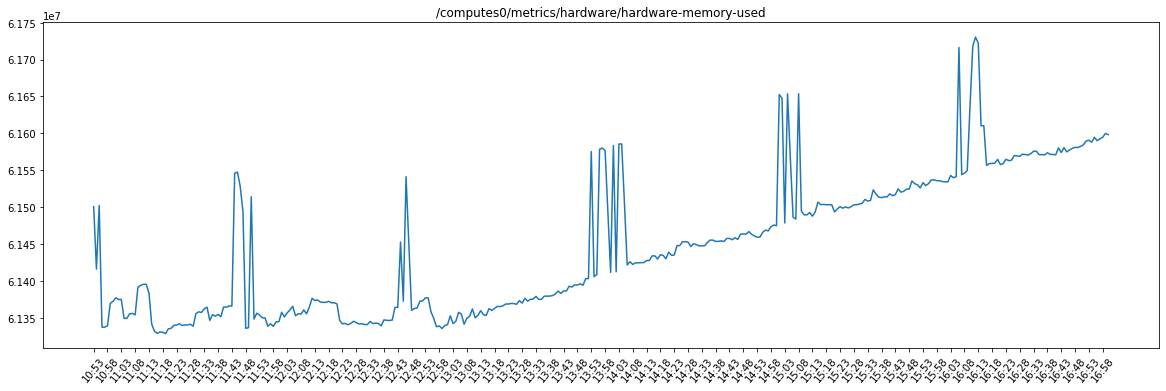

In [88]:
#physical里面的metrics：hardware-cpu-util、hardware-disk-size-used、hardware-memory-used、hardware-network-ip-incoming-datagrams、hardware-network-ip-outgoing-datagrams、hardware-system_stats-io-incoming-blocks、hardware-system_stats-io-outgoing-blocks

y1 = df['/computes0/metrics/hardware/hardware-cpu-util']
plt.figure(figsize=(20, 6))
plt.plot(X,y1)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-cpu-util')
plt.show()

y2 = df['/computes0/metrics/hardware/hardware-disk-size-used']
plt.figure(figsize=(20, 6))
plt.plot(X,y2)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-disk-size-used')
plt.show()

y3 = df['/computes0/metrics/hardware/hardware-memory-used']
plt.figure(figsize=(20, 6))
plt.plot(X,y3)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-memory-used')
plt.show()



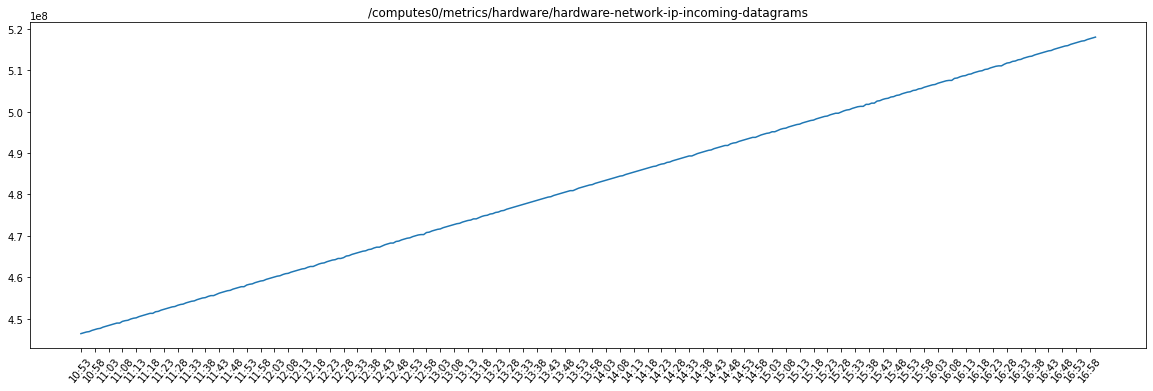

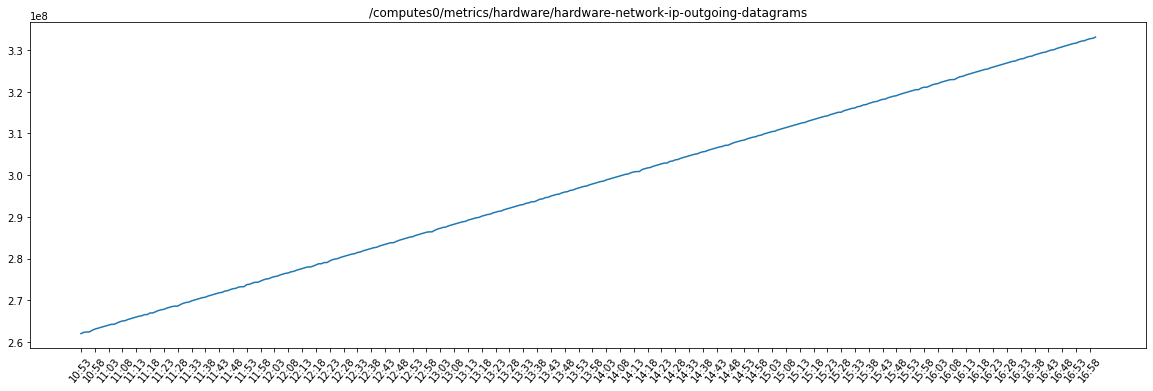

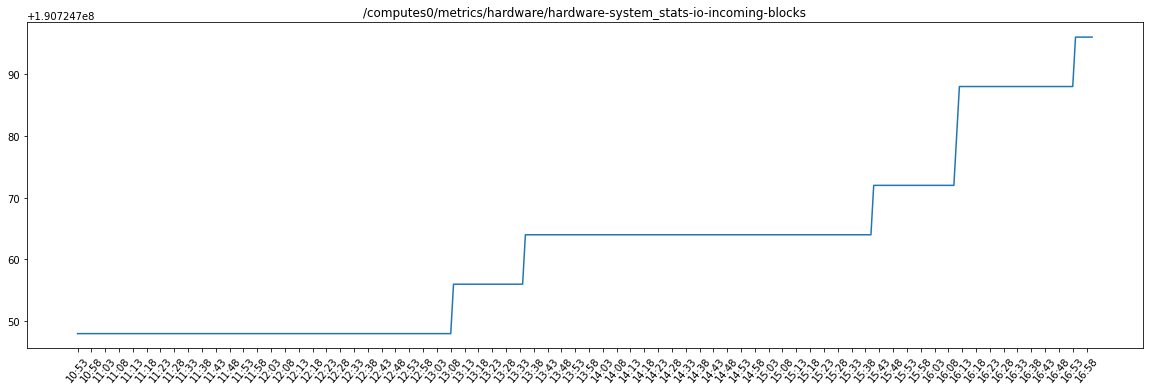

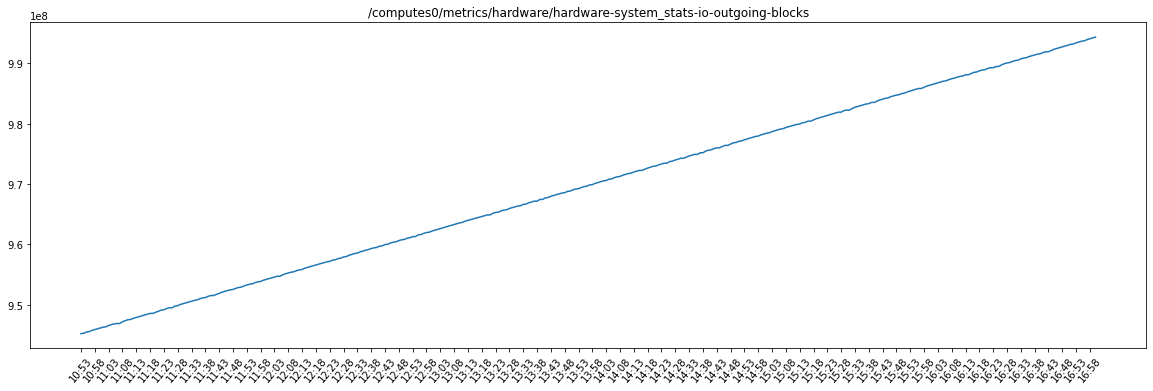

In [89]:
y4 = df['/computes0/metrics/hardware/hardware-network-ip-incoming-datagrams']
plt.figure(figsize=(20, 6))
plt.plot(X,y4)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-network-ip-incoming-datagrams')
plt.show()

y5 = df['/computes0/metrics/hardware/hardware-network-ip-outgoing-datagrams']
plt.figure(figsize=(20, 6))
plt.plot(X,y5)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-network-ip-outgoing-datagrams')
plt.show()

y6 = df['/computes0/metrics/hardware/hardware-system_stats-io-incoming-blocks']
plt.figure(figsize=(20, 6))
plt.plot(X,y6)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-system_stats-io-incoming-blocks')
plt.show()

y7 = df['/computes0/metrics/hardware/hardware-system_stats-io-outgoing-blocks']
plt.figure(figsize=(20, 6))
plt.plot(X,y7)
plt.xticks(X_axis, rotation=50)
plt.title('/computes0/metrics/hardware/hardware-system_stats-io-outgoing-blocks')
plt.show()

